<a href="https://colab.research.google.com/github/joungminhee/study/blob/master/%08titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#데이터셋 준비

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# 데이터 요약정보 확인

In [ ]:
train.info() #Age 와 Cabin NAN값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 각 변수 별 설명

* PassengerId : 각 승객의 고유 번호

* Survived : 생존 여부(종속 변수)
 * 0 = 사망
 * 1 = 생존
* Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower
* Name : 이름
* Sex : 성별
* Age : 나이

* SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

* Parch : 동반한 Parent(부모) Child(자식)의 수

* Ticket : 티켓의 고유넘버

* Fare : 티켓의 요금

* Cabin : 객실 번호

* Embarked : 승선한 항
 * C = Cherbourg
 * Q = Queenstown
 * S = Southampton


# 데이터분석

In [ ]:
train.describe() #숫자 기술 통계량

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 훈련 자료 object 변수 통계치
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# 훈련 자료에서 성별(Sex)에 따른 생존율 비교
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# 함께 승선한 형제자매와 배우자 수(SibSp)에 따른 생존율 비교
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


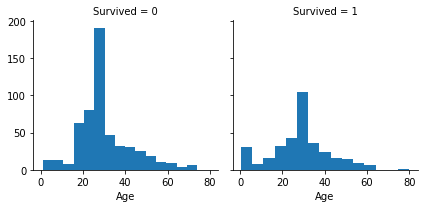

In [ ]:
# 생존 여부(Survived)에 따른 연령(Age) 분포
S = sns.FacetGrid(train, col='Survived')
S.map(plt.hist,'Age',bins=15)
# 다양한 범주형 값을 가지는 데이터를 시각화하는데 좋은 방법=FacetGrid
plt.show()

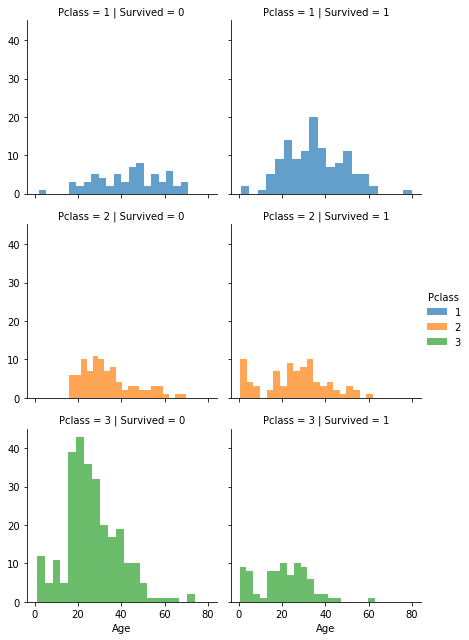

In [ ]:
# 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포
P = sns.FacetGrid(train, col='Survived', row='Pclass',hue='Pclass')
P.map(plt.hist,'Age',bins=20,alpha=0.7)
P.add_legend()
plt.show()

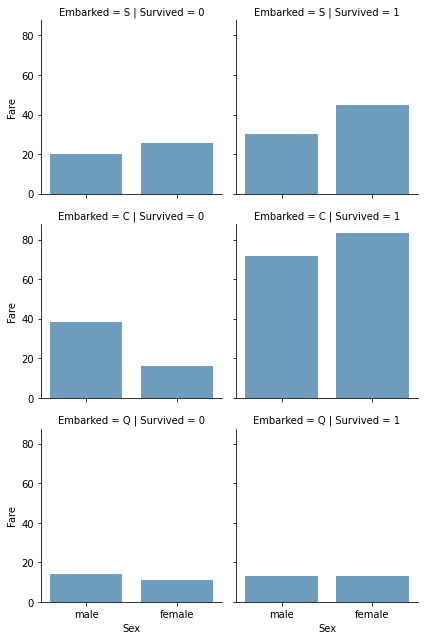

In [ ]:
# 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)
emb_sur = sns.FacetGrid(train, row='Embarked', col='Survived')
emb_sur.map(sns.barplot, 'Sex', 'Fare', order=['male','female'],ci=None,alpha=0.7)
plt.show()

# 데이터 전처리

##안쓰는 변수 제거(columns)

In [ ]:
# drop 열 제거/ axis = 0 'index'행에 대해 작용 / axis = 1 'columns' 열에 대해 작용
print("before",train.shape,test.shape)

before (891, 12) (418, 11)


In [ ]:
train = train.drop(['Ticket','Cabin'], axis=1)
test = test.drop(['Ticket','Cabin'], axis=1)

In [ ]:
combine = [train,test]
print("after", train.shape,test.shape)

after (891, 10) (418, 9)


In [ ]:
combine

In [ ]:
# expand = True 이면 columns, expand = False 이면 label
# combine 메서드는 두 pandas 객체를 func함수를 이용하여 결합하는 메서드
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [ ]:
pd.crosstab(train.Title,train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


## 범주화 > 수치화

In [ ]:
# 범주화(여자/남자/ 나머지 Rare로 나누기)
for dataset in combine:
    dataset.Title = dataset.Title.replace(['Col','Capt','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir','Rev'],'Rare')
    dataset.Title = dataset.Title.replace(['Mlle'],'Miss')
    dataset.Title = dataset.Title.replace(['Mrs'],'Miss')
    dataset.Title = dataset.Title.replace(['Mme'],'Mrs')

In [ ]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.738710
2,Mr,0.156673
3,Ms,1.000000
4,Rare,0.347826


In [ ]:
# Title 변수를 숫자형 변수로 바꿔줌
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

In [ ]:
test.info()

In [ ]:
# 안쓰는 변수 제거

train = train.drop(['PassengerId','Name'],axis=1)
test = test.drop(['PassengerId'],axis=1)

In [ ]:
combine = [train,test]
print(train.shape,test.shape)

(891, 9) (418, 9)


In [ ]:
# 성별(Sex) 변수를 숫자 범주형 변수로 바꿔줌
Sex_mapping = {'male':1, 'female':2}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(Sex_mapping).astype(int)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1.0
1,1,1,2,38.0,1,0,71.2833,C,2.0
2,1,3,2,26.0,0,0,7.9250,S,2.0
3,1,1,2,35.0,1,0,53.1000,S,2.0
4,0,3,1,35.0,0,0,8.0500,S,1.0


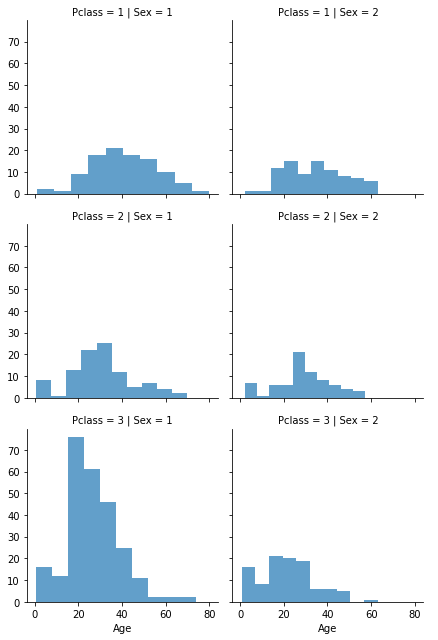

In [ ]:
grid = sns.FacetGrid(train,row='Pclass',col='Sex')
grid.map(plt.hist,'Age',alpha=0.7)
grid.add_legend()
plt.show()

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
AgeGroup    0
dtype: int64

In [ ]:
# train의 age값을 중위수로 대체
train['Age'] = train['Age'].fillna(train['Age'].median())
# pandas의 median()메소드로 'Age'필드의 중간값을 가져와서 fillna()함수를 사용하여 'Age'필드의 중간값으로 'Age'필드의 결측치를 바꾼다.​

In [ ]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train['AgeGroup'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,7.2500,S,1.0,Youth
1,1,1,2,38.0,1,0,71.2833,C,2.0,MiddleAged
2,1,3,2,26.0,0,0,7.9250,S,2.0,YoungAdult
3,1,1,2,35.0,1,0,53.1000,S,2.0,YoungAdult
4,0,3,1,35.0,0,0,8.0500,S,1.0,YoungAdult


In [ ]:
# Embarked의 결측치를 최빈값으로 대체 'S'
freq_port = train.Embarked.dropna().mode()[0]
freq_port

train['Embarked'] = train['Embarked'].fillna(freq_port)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,7.2500,0,1.0,4
1,1,1,2,38.0,1,0,71.2833,1,2.0,1
2,1,3,2,26.0,0,0,7.9250,0,2.0,3
3,1,1,2,35.0,1,0,53.1000,0,2.0,3
4,0,3,1,35.0,0,0,8.0500,0,1.0,3


In [ ]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# embarked 변수를 숫자 범주형 변수로 바꿔줌
emb_mapping = {'S':0, 'C':1,'Q':2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(emb_mapping).astype(int)

In [ ]:
#Labelencoder()
# sklearn.preprocessing 안에 있는 모듈인 LabelEncoder를 활용하면 카테고리를 수치화할 수 있다.

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in ['AgeGroup']:
    train[col] = label.fit_transform(train[col])

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,7.2500,0,1.0,4
1,1,1,2,38.0,1,0,71.2833,1,2.0,1
2,1,3,2,26.0,0,0,7.9250,0,2.0,3
3,1,1,2,35.0,1,0,53.1000,0,2.0,3
4,0,3,1,35.0,0,0,8.0500,0,1.0,3


In [ ]:
train= train.drop(['FareBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,7.2500,0,1.0,4
1,1,1,2,38.0,1,0,71.2833,1,2.0,1
2,1,3,2,26.0,0,0,7.9250,0,2.0,3
3,1,1,2,35.0,1,0,53.1000,0,2.0,3
4,0,3,1,35.0,0,0,8.0500,0,1.0,3


In [ ]:
train.AgeGroup.value_counts()

3    373
1    195
4    162
0    139
2     22
Name: AgeGroup, dtype: int64

## 각 전처리 설명 변수
* Survived = 0 : 죽음 1: 생존
* Pclass 1:1등급 , 2: 2등급 , 3: 3등급
* Sex 1: 남자, 2:여자
* Sibsp 1: 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
* AgeGroup : 0 : 0~ 18
 * 1: 18 ~ 25
 * 2: 25 ~ 35 
 * 3: 35 ~ 60 
 * 4: 60 ~ 100
* Embarked : S:0, C:1, Q:2
* Title : Mr: 1, Miss: 2, Mrs: 3, Master: 4, Rare: 5

In [ ]:
# train['FareBand'] = pd.cut(train['Fare'], 4)
# # Fareband 파생변수 생성 후 카테고리를 4개로 수치화함
# train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)